nodes: 71723
edges: 124528


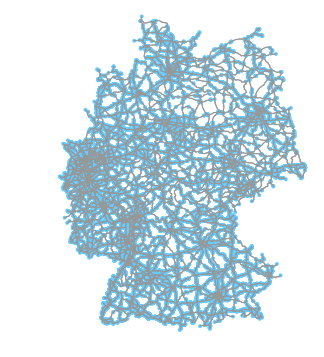

In [9]:
#prim network

nodes: 157271
edges: 229666


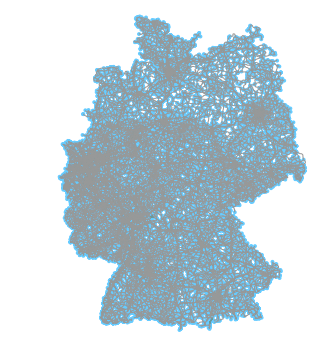

In [49]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString, Point


graph1 =ox.load_graphml( filename="allGermany_allstreetsUntilSec_proj.graphml")
graph =graph1.to_undirected()

print ("nodes: " + str(len(graph.nodes(data=True))))
print ("edges: " + str(len(graph.edges(data=True))))
fig, ax = ox.plot_graph(graph)

In [2]:
nodes_1, edges_1 = ox.graph_to_gdfs(graph, nodes=True, edges=True)
edges_1.head()

,access,area,bridge,est_width,geometry,highway,id,junction,key,landuse,...,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width
0,NaN,NaN,yes,NaN,LINESTRING (351586.3080871678 5691746.57917163...,motorway_link,0,NaN,0,NaN,...,NaN,NaN,True,"[321450867, 24615756, 24615790]",NaN,NaN,NaN,52690944,327273674,NaN
1,NaN,NaN,NaN,NaN,LINESTRING (351586.3080871678 5691746.57917163...,motorway_link,0,NaN,0,NaN,...,NaN,NaN,True,6273862,NaN,NaN,NaN,52690944,899088653,NaN
2,NaN,NaN,yes,NaN,LINESTRING (351724.253630074 5691837.699355782...,motorway_link,0,NaN,0,NaN,...,NaN,NaN,True,"[147476776, 4298329, 147476771]",NaN,NaN,NaN,52690944,1604129763,NaN
3,NaN,NaN,NaN,NaN,LINESTRING (411445.4129331233 5319032.20763055...,trunk,0,NaN,0,NaN,...,80,Paduaallee,True,"[237884449, 237860090, 237884451]",NaN,NaN,NaN,150994944,25180712,NaN
4,NaN,NaN,yes,NaN,LINESTRING (411805.6286332309 5319426.83547224...,trunk,0,NaN,0,NaN,...,80,"[Paduaallee, Granadaallee]",True,"[4549145, 27361986, 30277843]",NaN,NaN,NaN,150994944,300395130,NaN


In [3]:
nodes_1.head()

,highway,lat,lon,osmid,ref,x,y,geometry
122321,nan,53.5279726,10.0241143,122321,nan,567886,5.93149e+06,POINT (567886.2927707757 5931493.647788326)
122329,nan,53.5374964,10.0310022,122329,nan,568328,5.93256e+06,POINT (568327.5286479212 5932559.722304482)
122332,nan,53.5390388,10.0322755,122332,nan,568409,5.93273e+06,POINT (568409.4247386653 5932732.531079164)
122352,nan,53.5500046,9.9715378,122352,nan,564368,5.9339e+06,POINT (564367.7835024876 5933895.834052235)
122353,nan,53.5501443,9.9711395,122353,nan,564341,5.93391e+06,POINT (564341.1835657096 5933911.015434771)


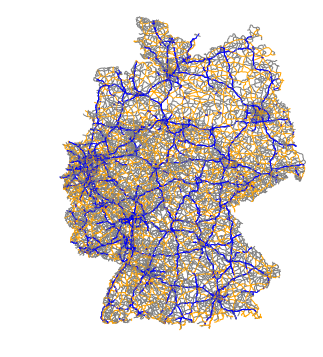

In [4]:
# create empty list for node colors
edge_color = []

# for each node in the graph
for edge in graph.edges(data=True):

    # if the node has the attribute group1 highway
    if 'primary' in edge[2]['highway']:
        edge_color.append('orange')
    elif 'motorway' in edge[2]['highway']:
        edge_color.append('blue')
    elif 'trunk' in edge[2]['highway']:
        edge_color.append('blue')
    elif 'secondary' in edge[2]['highway']:
        edge_color.append('grey')
    else:
        edge_color.append('grey')  
    
fig, ax = ox.plot_graph(graph,  edge_color=edge_color, node_color='none')

In [10]:
# weight the network
keys = {}

for edge in (graph.edges(data=True)):

    attrs = {}
    if edge[2]['highway']=='motorway':
        attrs['weight']= edge[2]['length']*1
    elif edge[2]['highway']=='primary':
        attrs['weight']= edge[2]['length']*1.5
    elif edge[2]['highway']=='secondary':
        attrs['weight']= edge[2]['length']*1.8
    else:
        attrs['weight']= edge[2]['length']*3

    keyy=(edge[0], edge[1], 0)
    keys[keyy] = attrs

nx.set_edge_attributes(graph, keys)

nodes_1, edges_1 = ox.graph_to_gdfs(graph, nodes=True, edges=True)
edges_1.head()

,access,area,bridge,est_width,geometry,highway,id,junction,key,landuse,...,name,oneway,osmid,ref,service,tunnel,u,v,weight,width
0,NaN,NaN,yes,NaN,LINESTRING (351586.3080871678 5691746.57917163...,motorway_link,0,NaN,0,NaN,...,NaN,True,"[321450867, 24615756, 24615790]",NaN,NaN,NaN,52690944,327273674,1817.540575,NaN
1,NaN,NaN,NaN,NaN,LINESTRING (351586.3080871678 5691746.57917163...,motorway_link,0,NaN,0,NaN,...,NaN,True,6273862,NaN,NaN,NaN,52690944,899088653,1100.692968,NaN
2,NaN,NaN,yes,NaN,LINESTRING (351724.253630074 5691837.699355782...,motorway_link,0,NaN,0,NaN,...,NaN,True,"[147476776, 4298329, 147476771]",NaN,NaN,NaN,52690944,1604129763,495.297920,NaN
3,NaN,NaN,NaN,NaN,LINESTRING (411445.4129331233 5319032.20763055...,trunk,0,NaN,0,NaN,...,Paduaallee,True,"[237884449, 237860090, 237884451]",NaN,NaN,NaN,150994944,25180712,1318.280545,NaN
4,NaN,NaN,yes,NaN,LINESTRING (411805.6286332309 5319426.83547224...,trunk,0,NaN,0,NaN,...,"[Paduaallee, Granadaallee]",True,"[4549145, 27361986, 30277843]",NaN,NaN,NaN,150994944,300395130,1602.311640,NaN


origin_node: 266803181
destination_node: 13878070
 
Highway part length: 
motorway: 460 km
trunk:    1 km
primary:  0 km
secondary:  23 km
 
Route length: 483 km
 
First Entry to Motorway:    1120499372
Last Exit to Motorway:      266400662


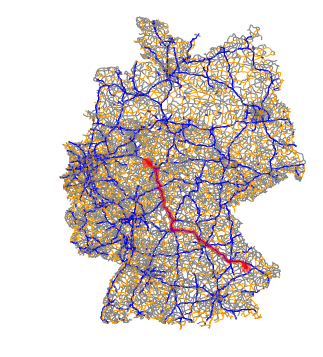

In [50]:
##################### TESTING #############

from pandas import *

origin_node = list(graph.nodes())[1000]
destination_node = list(graph.nodes())[-10000]

print ("origin_node:      " + str(origin_node))
print ("destination_node: " + str(destination_node))
print (" ")

route = nx.shortest_path(graph, origin_node, destination_node, weight='weight')
     
if len(route)>1: 
    length = 0
    motorway_length = 0
    trunk_length = 0
    primary_length = 0
    secondary_length = 0
    allMotoLinkNodes=[]
    #iterate over every single edge along the path
    for i in range(len(route)-1):
        edgeData= graph.get_edge_data(route[i],route[i+1])
        if edgeData[0].get('highway') == 'motorway_link':
            #frist node of link
            allMotoLinkNodes.append(route[i])
            #second node of link
            allMotoLinkNodes.append(route[i+1])
        length = length + edgeData[0].get('length')
        if edgeData[0].get('highway') in ('motorway','motorway_link') :
            motorway_length = motorway_length + edgeData[0].get('length')
        elif edgeData[0].get('highway') in ('trunk', 'trunk_link'):
            trunk_length = trunk_length + edgeData[0].get('length')
        elif edgeData[0].get('highway') in ('primary', 'primary_link'):
            primary_length = primary_length + edgeData[0].get('length')
        elif edgeData[0].get('highway') in ('secondary', 'secondary_link'):
            secondary_length = secondary_length + edgeData[0].get('length') 

#print (length_raw)
print ("Highway part length: ")
print ("motorway: " + str(int(round(motorway_length/1000))) + " km")
print ("trunk:    " + str(int(round(trunk_length/1000))) + " km")
print ("primary:  " + str(int(round(primary_length/1000))) + " km")
print ("secondary:  " + str(int(round(secondary_length/1000))) + " km")
print (" ")
print ("Route length: " + str(int(round(length/1000))) + " km")

print (" ")
print (" ")
#print (allMotoLinkNodes)
print ("First Entry to Motorway:    " + str(allMotoLinkNodes[0]))
print ("Last Exit to Motorway:      " + str(allMotoLinkNodes[-1]))
fig, ax = ox.plot_graph_route(graph, route=route,  edge_color=edge_color, node_color='none')

In [41]:
plz_df= pd.read_csv('//192.168.2.254/Motionlogic/Data_Science/Customer_Projects_DE/Nissan/routing/results/secondary_plz2plz/plz_centroide_utm32_nearest_graph-sec_node.csv')
print (plz_df)

                  X             Y  V_LFD  V_DAT    PLZ  \
0     830542.273549  5.667133e+06     33   1214   1067   
1     832010.317324  5.664958e+06     33   1214   1069   
2     832134.898562  5.668003e+06     33   1214   1097   
3     837556.987061  5.671025e+06     33   1214   1099   
4     834629.417826  5.677657e+06     33   1214   1108   
5     832817.347625  5.673843e+06     33   1214   1109   
6     831371.244492  5.669513e+06     33   1214   1127   
7     830255.782419  5.671207e+06     33   1214   1129   
8     828349.888260  5.669265e+06     33   1214   1139   
9     823688.038027  5.667366e+06     33   1214   1156   
10    826992.619080  5.667341e+06     33   1214   1157   
11    829275.763992  5.665172e+06     33   1214   1159   
12    826971.852149  5.664777e+06     33   1214   1169   
13    829410.126957  5.663324e+06     33   1214   1187   
14    829709.576323  5.661908e+06     33   1214   1189   
15    832578.832957  5.662415e+06     33   1214   1217   
16    834139.5

In [47]:
##################### PRODUCTION #############
#approx calcuation time 55h

import datetime
import sys
import csv
from shapely.geometry import LineString, Point

start_time= datetime.datetime.now()

plz_df= pd.read_csv('//192.168.2.254/Motionlogic/Data_Science/Customer_Projects_DE/Nissan/routing/results/secondary_plz2plz/plz_centroide_utm32_nearest_graph-sec_node.csv')

#get the OSM nodeID from the motorway junctions
#     #for testing small sample
#     plz_list = plz_df['nearest_graph_node'][:100].tolist()
plz_list = plz_df['nearest_graph_node'].tolist()

plz_list = list(map(int, plz_list))

print (len(plz_list))
start_list = plz_list
dest_list = plz_list
count=0



#get nearest node, if actual node is not in the graph
def getNearestNode(nodeid):
    coord_x = plz_df.loc[plz_df['nearest_graph_node']==str(nodeid) ]['X'].item()
    coord_y = plz_df.loc[plz_df['nearest_graph_node']==str(nodeid) ]['Y'].item()
    coords = (coord_x, coord_y)
    nearest_node = ox.get_nearest_node(graph, coords, method='euclidean')
    return nearest_node

#progressbar
def progress(count, total, status=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))
    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)
    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
sys.stdout.flush()


with open('route_length_plz2plz_germany-sec_'+ str(len(start_list)) + '_inclEntryExit.csv','a', newline='') as newFile:
    newFileWriter = csv.writer(newFile)
    newFileWriter.writerow(['origin_id','destination_id','distance','motorway_distance','trunk_distance','primary_distance','secondary_distance','first_mwEntry','last_mwExit'])

    #start to iterate over the nodeslist
    for start in start_list:
        count=count+1
        progress(count, len(start_list), status='')
        #catch if startnode not in network
        try: 
            #calculate the route from the OSM node to all nodes in the network
            routes_dij = nx.single_source_dijkstra_path(G=graph, source=start,weight='weight')
        except:
            print ('')
            print("Start node " + str(start) +" not found")
            nearest_node = getNearestNode(start)
            print("Using nearest node instead, nodeid: " + str(nearest_node))
            routes_dij = nx.single_source_dijkstra_path(G=graph, source=nearest_node,weight='weight')
    
        for route in list(routes_dij.items()):
            if route[0] in dest_list:
                #to make sure it is a route       
                if len(route[1])>1: 
                    length = 0
                    motorway_length = 0
                    trunk_length = 0
                    primary_length = 0
                    secondary_length = 0
                    allMotoLinkNodes=[]
                    #iterate over every single edge along the path
                    for i in range(len(route[1])-1):
                        edgeData= graph.get_edge_data(route[1][i],route[1][i+1])
                        if edgeData[0].get('highway') == 'motorway_link':
                            #print (route[1][i])
                            #frist node of link
                            allMotoLinkNodes.append(route[1][i])
                            #second node of link
                            allMotoLinkNodes.append(route[1][i+1])
                        length = length + edgeData[0].get('length')
                        if edgeData[0].get('highway') in ('motorway','motorway_link') :
                            motorway_length = motorway_length + edgeData[0].get('length')
                        elif edgeData[0].get('highway') in ('trunk', 'trunk_link'):
                            trunk_length = trunk_length + edgeData[0].get('length')
                        elif edgeData[0].get('highway') in ('primary', 'primary_link'):
                            primary_length = primary_length + edgeData[0].get('length')
                        elif edgeData[0].get('highway') in ('secondary', 'secondary_link'):
                            secondary_length = secondary_length + edgeData[0].get('length')
                    if len(allMotoLinkNodes)>0: 
                        newFileWriter.writerow([origin_node, route[0], int(round(length/1000)), int(round(motorway_length/1000)), int(round(trunk_length/1000)), int(round(primary_length/1000)), int(round(secondary_length/1000)), int(allMotoLinkNodes[0]), int(allMotoLinkNodes[-1])])
                    else:
                        newFileWriter.writerow([origin_node, route[0], int(round(length/1000)), int(round(motorway_length/1000)), int(round(trunk_length/1000)), int(round(primary_length/1000)), int(round(secondary_length/1000)), 0, 0])
                        
    #keep track of performance    
    end_time= datetime.datetime.now()
    delta_time = int((end_time-start_time).total_seconds())
    print ('')
    print ('origins: ' + str(len(start_list)))
    print ('time:    ' + str(delta_time))
    print ('origins per sec: ' + str(delta_time/len(start_list)))
    print ('rel:     '+ str((len(start_list)*(len(start_list)))))
    print ('rel per sec: ' + str(delta_time/(len(start_list)*(len(start_list)))))
        
# output_df= pd.read_csv('C:/Users/Simon/Desktop/sonstiges/py_gis_networkx/route_length_plz2plz_germany-sec_'+ str(len(start_list)) + '.csv')
# print ('actual number of rel: '+ str(len(output_df)))

100
21647146-----------------------------------------------------] 1.0% ...
25269444
773669977
317611131
317611132
29535024
29535020
317611131
317611132
25625784
778163596
824128543
297545801
317611131
317611132
773633045
347325305
347325304
619879407
619879406
317611131
317611132
251771784
251771779
3246487542
21647146
25269444
27148430
317611131
317611132
29535024
29535020
773669977
2458418001
3246395008
773603158
778163596
824128543
212763373
212763364
1926186096
1926186093
778163596
824128543
212763373
212763364
1926186096
1926186093
317611131
317611132
1630989546
773669977
25621131
1614254300
778163596
824128543
832579717
1854268576
832579703
317611131
317611132
471404468
247429847
555119350
773669977
25621131
317611131
317611132
1611207716
1611207735
2680079647
773669977
2458418001
3246395008
773603158
317611131
317611132
1611207716
1611207735
2680079647
773669977
2458418001
3246395008
773603158
317611131
317611132
1630989543
317611131
317611132
636906008
98313732
3005527156
7736

27598015-----------------------------------------------------] 7.0% ...
25096273
442832879
151083532
442828559
442828572
335688683
442838541
2453207682
828163535
442832879
151083532
442828559
442828572
335688683
442838541
29535024
29535020
335688683
442838541
25625784
335688683
442838541
773633045
347325305
347325304
27598015
4186859645
10940911
839865307
778163596
824128543
297545801
335688683
442838541
251771784
251771779
3246487542
619879407
619879406
442832879
151083532
442828559
442828572
27148430
335688683
442838541
29535024
29535020
335688683
442838541
773603092
773603131
773603088
335688683
442838541
1630989546
442832879
151083532
442828559
442828572
25621131
1614254300
778163596
824128543
212763373
212763364
1926186096
1926186093
778163596
824128543
212763373
212763364
1926186096
1926186093
335688683
442838541
471404468
247429847
555119350
335688683
442838541
98314346
2705381968
3171505638
778163596
824128543
832579717
1854268576
832579703
442832879
151083532
442828559
4428285

778163596----------------------------------------------------] 12.0% ...
824128543
6697988
6697990
21647146
25269444
773669977
778163596
824128543
15015564
1363071246
778163596
824128543
297545801
317611131
317611132
29535024
29535020
317611131
317611132
25625784
619879407
619879406
317611131
317611132
773633045
347325305
347325304
317611131
317611132
251771784
251771779
3246487542
21647146
25269444
27148430
778163596
824128543
15015564
1363071246
778163596
824128543
15015564
1363071246
778163596
824128543
212763373
212763364
1926186096
1926186093
778163596
824128543
212763373
212763364
1926186096
1926186093
317611131
317611132
29535024
29535020
773669977
2458418001
3246395008
773603158
778163596
824128543
15015564
1363071246
778163596
824128543
832579717
1854268576
832579703
317611131
317611132
1630989546
773669977
25621131
1614254300
317611131
317611132
471404468
247429847
555119350
778163596
824128543
15015564
1363071246
773669977
25621131
317611131
317611132
1611207716
1611207735
2

15017249===--------------------------------------------------] 17.0% ...
2480982239
297545801
773669977
778163506
778163479
139470345
778163587
10941033
15017214
2480982184
317611131
317611132
29535024
29535020
317611131
317611132
25625784
317611131
317611132
773633045
347325305
347325304
317611131
317611132
251771784
251771779
3246487542
15017249
2480982239
212763373
212763364
1926186096
1926186093
15017249
2480982239
212763373
212763364
1926186096
1926186093
139470345
778163587
773684928
27148430
15017249
2480982239
832579717
1854268576
832579703
317611131
317611132
29535024
29535020
773669977
2458418001
3246395008
773603158
317611131
317611132
1630989546
773669977
25621131
1614254300
317611131
317611132
471404468
247429847
555119350
317611131
317611132
1630989546
773669977
25621131
317611131
317611132
1611207716
1611207735
2680079647
773669977
2458418001
3246395008
773603158
317611131
317611132
1611207716
1611207735
2680079647
773669977
2458418001
3246395008
773603158
317611131
3176

773669977=====-----------------------------------------------] 22.0% ...
317611131
317611132
29535024
29535020
778163596
824128543
297545801
317611131
317611132
25625784
139470345
778163587
10941033
317611131
317611132
251771784
251771779
3246487542
317611131
317611132
773633045
347325305
347325304
619879407
619879406
27148430
778163596
824128543
212763373
212763364
1926186096
1926186093
778163596
824128543
212763373
212763364
1926186096
1926186093
317611131
317611132
29535024
29535020
773669977
2458418001
3246395008
773603158
317611131
317611132
471404468
247429847
555119350
317611131
317611132
1630989546
773669977
25621131
1614254300
778163596
824128543
832579717
1854268576
832579703
317611131
317611132
1630989546
773669977
25621131
317611131
317611132
1611207716
1611207735
2680079647
773669977
2458418001
3246395008
773603158
317611131
317611132
1611207716
1611207735
2680079647
773669977
2458418001
3246395008
773603158
317611131
317611132
1630989543
773669977
122378292
769847893
7698

25625791===========------------------------------------------] 30.0% ...
3246220651
252533504
3246224365
252533502
252533504
3246224365
252533502
29401233
29401237
773603079
773603088
773603131
471404468
247429847
555119350
32603395
773603158
3246395008
331319891
2705381998
25625791
3246220651
252533478
27254446
442838541
25625791
3246220651
252533478
25096273
252533504
3246224365
252533502
824105653
1147969960
252533504
3246224365
252533502
32603395
773603158
3246395008
122378292
769847893
769847902
32603395
773603158
3246395008
331319891
2705381998
773603079
773603088
773603131
636906008
98313732
3005527156
773603079
773603088
773603131
25625791
3246220651
252533478
4186859645
10940911
839865307
778163596
824128543
297545801
252533504
3246224365
252533502
824105653
1147969960
252533504
3246224365
252533502
25621126
1630989546
252533504
3246224365
252533502
25621126
1630989528
2626437430
152459408
619879407
619879406
252533504
3246224365
252533502
27148430
252533504
3246224365
2525335

31347711=============----------------------------------------] 33.0% ...
1147969960
27598015
25096273
27254448
442828559
442828572
27254448
442828559
442828572
1629974641
15866451
31347711
1147969960
29401233
29401237
27254448
442828559
442828572
25272065
25272045
2246314929
773660264
2454004902
25625784
31347711
1147969960
29509997
252533502
3246224365
27254448
442828559
442828572
25272065
25272045
27598015
4186859645
10940911
839865307
29543233
773633062
773633050
1614254300
28374045
347325304
347325305
1630989546
31347711
1147969960
25624615
25624637
3246487761
31347711
1147969960
2458418001
3246395008
773603158
31347711
1147969960
29401233
29401237
27254448
442828559
442828572
27148430
27598015
4186859645
10940911
839865307
778163596
824128543
297545801
29543233
773633062
773633050
28374045
347325304
347325305
1611207716
1611207735
2680079647
28374045
347325304
347325305
1611207716
1611207735
2680079647
619879407
619879406
28374045
347325304
347325305
1630989543
27598015
4186859645

1613249072=============--------------------------------------] 37.0% ...
1614254300
1613249013
773633091
347325305
347325304
1613249013
2581346444
1613249013
773633091
347325305
347325304
1613249013
25272057
773660264
1613249072
1613249013
27254446
442838541
1613249013
27254446
442838541
1613249013
2581346444
29401233
29401237
1613249016
1613248958
1611207716
1611207735
2680079647
1613249016
1613248958
1611207716
1611207735
2680079647
1613249072
1624647670
1624647726
1613249013
25096273
1613249013
2454004902
25625784
1613249013
2581346444
29509997
252533502
3246224365
1613249013
440337754
317611132
1613249072
30811433
1613249072
30811433
1629974641
15866451
1613249013
440337754
317611132
1613249072
1607066115
1613249013
440337754
317611132
1613249016
1613248958
1613249013
440337754
317611132
1613249013
440337754
317611132
1613249013
440337754
317611132
1613249072
31308318
1051583033
2680077666
1613249013
440337754
317611132
1613249013
440337754
317611132
1613249013
440337754
317611132


152459408=================-----------------------------------] 42.0% ...
1611207732
2680077666
1051583033
1611207732
2680077666
1051583033
1624647670
1624647726
1613249013
773633091
347325305
347325304
1611207732
2680077666
1051583033
1607066115
1611207712
2680079647
1611207735
1613249013
2581346444
1613249013
25272057
773660264
1611207712
2680079647
1611207735
1607014736
1607014751
1613249013
27254446
442838541
1613249013
27254446
442838541
1613249013
2581346444
29401233
29401237
1611207732
2680077666
1051583033
1624647670
1624647726
1613249013
25096273
1613249013
2454004902
25625784
1613249013
2581346444
29509997
252533502
3246224365
1613249013
440337754
317611132
1613249072
30811433
800516190
1815728969
1613249013
440337754
317611132
1613249013
440337754
317611132
1613249013
440337754
317611132
1613249013
440337754
317611132
1613249013
440337754
317611132
1613249013
440337754
317611132
1613249013
440337754
317611132
1613249013
440337754
317611132
1613249013
440337754
317611132
16132

25272054=====================--------------------------------] 47.0% ...
15613290
25272045
15613290
25272045
824109954
2453232134
15613290
25272045
29401233
29401237
151013228
4186859645
10940911
839865307
25625784
800516190
1815728969
778163596
824128543
297545801
151013228
4186859645
10940911
839865307
251771784
251771779
3246487542
619879407
619879406
15613290
25272045
2458418001
3246395008
773603158
15613290
25272045
29401233
29401237
29543233
773633062
773633050
1614254300
778163596
824128543
212763373
212763364
1926186096
1926186093
778163596
824128543
212763373
212763364
1926186096
1926186093
15613290
25272045
471404493
98313792
2944274212
15613290
25272045
331319891
2705381998
29543233
773633062
773633050
778163596
824128543
832579717
1854268576
832579703
28374045
347325304
347325305
1611207716
1611207735
2680079647
28374045
347325304
347325305
1611207716
1611207735
2680079647
28374045
347325304
347325305
1630989543
15613290
25272045
2458418001
3246395008
773603158
15613290
252

12262630========================-----------------------------] 52.0% ...
778163596
824128543
6697988
6697990
26910090
12262886
839865307
773684928
25096273
778163596
824128543
6697988
6697990
778163596
824128543
15015564
1363071246
778163596
824128543
297545801
773669977
619879407
619879406
317611131
317611132
29535024
29535020
76684811
1811454768
76684806
27148430
317611131
317611132
25625784
317611131
317611132
773633045
347325305
347325304
778163596
824128543
15015564
1363071246
778163596
824128543
15015564
1363071246
778163596
824128543
212763373
212763364
1926186096
1926186093
778163596
824128543
212763373
212763364
1926186096
1926186093
317611131
317611132
251771784
251771779
3246487542
778163596
824128543
15015564
1363071246
778163596
824128543
832579717
1854268576
832579703
317611131
317611132
29535024
29535020
773669977
2458418001
3246395008
773603158
317611131
317611132
1630989546
773669977
25621131
1614254300
778163596
824128543
15015564
1363071246
317611131
317611132
471404

12262630===========================--------------------------] 57.0% ...
12262886
839865307
773684928
15866433
15866451
12262886
839865307
773684928
25096273
778163596
824128543
6697988
6697990
12262886
839865307
773684928
25272054
76684811
1811454768
76684806
27148430
778163596
824128543
6697988
6697990
778163596
824128543
15015564
1363071246
12262630
12262886
839865307
773684928
2453207682
828163535
778163596
824128543
297545801
12262886
839865307
773684928
25272054
12262886
839865307
773684928
25096273
12262886
839865307
773684928
29535024
29535020
12262886
839865307
773684928
25625784
619879407
619879406
12262886
839865307
773684928
773633045
347325305
347325304
12262886
839865307
773684928
25096273
778163596
824128543
15015564
1363071246
778163596
824128543
15015564
1363071246
778163596
824128543
212763373
212763364
1926186096
1926186093
778163596
824128543
212763373
212763364
1926186096
1926186093
12262886
839865307
773684928
251771784
251771779
3246487542
778163596
824128543
150

2480982180============================-----------------------] 62.0% ...
2480982184
15016243
1748776512
3363427603
619879349
778163479
10941037
839866856
619879349
778163479
773669977
317611131
317611132
29535024
29535020
317611131
317611132
25625784
317611131
317611132
773633045
347325305
347325304
824128565
778163587
773684928
27148430
317611131
317611132
251771784
251771779
3246487542
317611131
317611132
29535024
29535020
773669977
2458418001
3246395008
773603158
317611131
317611132
1630989546
773669977
25621131
1614254300
317611131
317611132
471404468
247429847
555119350
773669977
25621131
317611131
317611132
1611207716
1611207735
2680079647
773669977
2458418001
3246395008
773603158
317611131
317611132
1611207716
1611207735
2680079647
773669977
2458418001
3246395008
773603158
317611131
317611132
1630989543
317611131
317611132
636906008
98313732
3005527156
773669977
122378292
769847893
769847902
317611131
317611132
1607087425
1607087478
317611131
317611132
317611131
317611132
317611

1931365978===============================--------------------] 66.0% ...
208532897
208532895
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
773684928
15017262
1363071246
619879417
824128543
1926186090
1926186093
1926186096
212763364
832579717
1854268576
832579703
15017262
1363071246
619879417
824128543
15017262
1363071246
10941033
15017262
1363071246
619879417
824128543
773669977
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
317611131
317611132
29535024
29535020
317611131
317611132
25625784
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
773684928
27148430
317611131
317611132
773633045
347325305
347325304
15017262

3363427603=================================------------------] 70.0% ...
1926186090
1926186093
1926186096
212763364
297545801
1926186090
1926186093
1926186096
212763364
15015574
2480982239
1926186090
1926186093
1926186096
212763364
15015574
2480982239
1926186090
1926186093
1926186096
212763364
619879417
824128543
1931365978
208532897
208532895
15015907
2480982184
1926186090
1926186093
1926186096
212763364
619879417
824128543
1926186090
1926186093
1926186096
212763364
15015574
2480982239
1926186090
1926186093
1926186096
212763364
619879417
824128543
1926186090
1926186093
1926186096
212763364
619879417
824128543
1926186090
1926186093
1926186096
212763364
619879417
824128543
1926186090
1926186093
1926186096
212763364
619879417
824128543
1926186090
1926186093
1926186096
212763364
619879417
824128543
1926186090
1926186093
1926186096
212763364
619879417
824128543
1926186090
1926186093
1926186096
212763364
619879417
824128543
1926186090
1926186093
1926186096
212763364
619879417
824128543
1931

1931365978===================================----------------] 73.0% ...
208532897
208532895
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
773684928
773669977
1926186090
1926186093
1926186096
212763364
832579717
1854268576
832579703
15017262
1363071246
619879417
824128543
15017262
1363071246
10941033
317611131
317611132
29535024
29535020
25625791
3246220651
15017262
1363071246
619879417
824128543
317611131
317611132
773633045
347325305
347325304
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
619879417
824128543
15017262
1363071246
773684928
27148430
2705381992
2705381998
122378292
769847893
769847902
2705381776
3171505638
2705381968
317611131
317611132
29535024
29535020
317611131
3176

2944274204======================================-------------] 79.0% ...
2944274212
98313792
122378292
769847893
769847902
2705381992
2705381998
25624615
25624637
3246487761
4453413538
98313827
555119350
247429847
2705381992
2705381998
251772788
3246395008
773603158
2705381776
3171505638
2705381968
252533485
2705381992
2705381998
2705381992
2705381998
29401233
29401237
2705381992
2705381998
824105653
1147969960
2705381776
3171505638
2705381968
27254446
442838541
2705381776
3171505638
2705381968
27254446
442838541
2705381776
3171505638
2705381968
25096273
2705381992
2705381998
25624615
25624637
3246487761
4453413538
2705381992
2705381998
824105653
1147969960
2705381992
2705381998
2705381992
2705381998
1629974641
15866451
2705381992
2705381998
25621126
773633045
347325305
347325304
2705381992
2705381998
25272065
25272045
2705381992
2705381998
1629974641
15866451
2705381776
3171505638
2705381968
4186859645
10940911
839865307
2705381992
2705381998
824105653
1147969960
2705381992
2705381998

11715697==========================================-----------] 82.0% ...
3005527156
98313732
554931527
247429847
555119350
3246881770
769847842
769847839
2705381992
2705381998
25624615
25624637
3246487761
4453413538
2705381992
2705381998
251772788
3246395008
773603158
2705381776
3171505638
2705381968
252533485
2705381992
2705381998
2705381992
2705381998
29401233
29401237
2705381992
2705381998
824105653
1147969960
2705381776
3171505638
2705381968
27254446
442838541
2705381776
3171505638
2705381968
27254446
442838541
2705381776
3171505638
2705381968
25096273
2705381992
2705381998
25624615
25624637
3246487761
4453413538
2705381992
2705381998
824105653
1147969960
2705381992
2705381998
2705381992
2705381998
1629974641
15866451
2705381992
2705381998
25621126
773633045
347325305
347325304
2705381992
2705381998
25272065
25272045
2705381992
2705381998
1629974641
15866451
2705381776
3171505638
2705381968
4186859645
10940911
839865307
2705381992
2705381998
824105653
1147969960
2705381992
27053819

2705381992==========================================---------] 85.0% ...
2705381998
471404493
98313792
2944274212
773603087
773603088
773603131
252533485
773603162
773603158
3246395008
773603162
773603158
3246395008
29401233
29401237
2705381992
2705381998
122378292
769847893
769847902
2705381776
3171505638
2705381968
773603162
773603158
3246395008
824105653
1147969960
773603087
773603088
773603131
27254446
442838541
773603087
773603088
773603131
27254446
442838541
773603087
773603088
773603131
25096273
1611207727
2680077666
1051583033
773603162
773603158
3246395008
824105653
1147969960
773603162
773603158
3246395008
824109969
1613249072
1614254300
773603162
773603158
3246395008
773603162
773603158
3246395008
1629974641
15866451
773603162
773603158
3246395008
824109969
1611207727
2680077666
1051583033
1624647670
1624647726
773603162
773603158
3246395008
824109969
773603162
773603158
3246395008
824109969
773603162
773603158
3246395008
824109969
773603162
773603158
3246395008
25272065
252

1611207727============================================-------] 88.0% ...
2680077666
1051583033
1611207727
2680077666
1051583033
1624647670
1624647726
1611207727
2680077666
1051583033
1607066115
1611207709
2680079647
1611207735
1611207727
2680077666
1051583033
1630989524
1611207709
2680079647
1611207735
1607014736
1607014751
1611207727
2680077666
1051583033
1624647670
1624647726
1611207709
2680079647
1611207735
296338782
1613248958
1611207709
2680079647
1611207735
773633091
347325305
347325304
1611207709
2680079647
1611207735
2581346444
1611207709
2680079647
1611207735
773633091
347325305
347325304
1611207709
2680079647
1611207735
296338782
1613248958
1611207709
2680079647
1611207735
25272057
773660264
1611207709
2680079647
1611207735
296338782
1613248958
1611207709
2680079647
1611207735
27254446
442838541
1611207709
2680079647
1611207735
27254446
442838541
1611207709
2680079647
1611207735
2581346444
29401233
29401237
1611207709
2680079647
1611207735
25096273
1611207709
2680079647
16112

1611207732=============================================------] 90.0% ...
2680077666
1051583033
1611207732
2680077666
1051583033
1624647670
1624647726
1611207732
2680077666
1051583033
1607066115
1611207712
2680079647
1611207735
152459408
1611207712
2680079647
1611207735
1607014736
1607014751
1611207732
2680077666
1051583033
1624647670
1624647726
1611207732
2680077666
1051583033
1630989567
1611207712
2680079647
1611207735
773633091
347325305
347325304
1611207712
2680079647
1611207735
2581346444
1611207712
2680079647
1611207735
773633091
347325305
347325304
1611207712
2680079647
1611207735
296338782
1613248958
1611207712
2680079647
1611207735
25272057
773660264
1611207712
2680079647
1611207735
27254446
442838541
1611207712
2680079647
1611207735
27254446
442838541
1611207712
2680079647
1611207735
2581346444
29401233
29401237
1611207712
2680079647
1611207735
25096273
1611207712
2680079647
1611207735
2454004902
25625784
1611207712
2680079647
1611207735
2581346444
29509997
252533502
324622436

1624647670==============================================-----] 92.0% ...
1624647726
1611207809
1051583033
2680077666
1611207809
1051583033
2680077666
1607066115
1630989524
1624647670
1624647726
1624596915
1624596913
1611207809
1051583033
2680077666
1607014741
1607014815
1624647670
1624647726
1630989567
773633123
773633050
773633062
30811433
773633123
773633050
773633062
1630989567
1630989567
1613249013
25272057
773660264
1630989567
30811433
21271513
442828572
442828559
151083532
30811433
21271513
442828572
442828559
151083532
1611207809
1051583033
2680077666
30811433
29401233
29401237
1630989567
30811433
25096273
1630989567
1613249013
2454004902
25625784
30811433
29509997
252533502
3246224365
30811433
824109969
30811433
30811433
1629974641
15866451
1630989567
30811433
824109969
1611207809
1051583033
2680077666
1611207809
1051583033
2680077666
30811433
824109969
30811433
824109969
30811433
824109969
30811433
824109969
30811433
824109969
1630989567
30811433
25272065
25272045
30811433
824

1608107559================================================---] 95.0% ...
1607014736
1607014751
1608107559
1624596931
1624596913
1624647713
1624647726
1611207803
1611207735
2680079647
1611207803
1611207735
2680079647
1608107559
1614254493
2626437430
152459408
1611207803
1611207735
2680079647
296338782
1613248958
773633091
347325305
347325304
2581346444
773633091
347325305
347325304
296338782
1613248958
25272057
773660264
296338782
1613248958
27254446
442838541
27254446
442838541
2581346444
29401233
29401237
1611207803
1611207735
2680079647
25096273
296338782
1613248958
2454004902
25625784
2581346444
29509997
252533502
3246224365
440337754
317611132
15866433
15866451
25272057
773660264
25621145
2453232134
440337754
317611132
296338782
1613248958
1611207803
1611207735
2680079647
1611207803
1611207735
2680079647
440337754
317611132
440337754
317611132
440337754
317611132
440337754
317611132
440337754
317611132
440337754
317611132
440337754
317611132
440337754
317611132
440337754
317611132


3246881770==================================================-] 98.0% ...
769847842
769847839
769847899
769847902
769847893
471404493
98313792
2944274212
769847899
769847902
769847893
471404493
98313792
2944274212
769847899
769847902
769847893
25624615
25624637
3246487761
769847899
769847902
769847893
25624615
25624637
3246487761
4453413538
769847899
769847902
769847893
331319891
2705381998
769847899
769847902
769847893
331319891
2705381998
769847899
769847902
769847893
251772788
3246395008
773603158
3246881770
769847842
769847839
252533485
769847899
769847902
769847893
769847899
769847902
769847893
29401233
29401237
769847899
769847902
769847893
331319891
2705381998
769847899
769847902
769847893
331319891
2705381998
769847899
769847902
769847893
331319891
2705381998
769847899
769847902
769847893
331319891
2705381998
769847899
769847902
769847893
824105653
1147969960
3246881770
769847842
769847839
27254446
442838541
3246881770
769847842
769847839
27254446
442838541
3246881770
769847842



origins: 100
time:    277
origins per sec: 2.77
rel:     10000
rel per sec: 0.0277


In [48]:
output_df= pd.read_csv('C:/Users/Simon/Desktop/sonstiges/py_gis_networkx/route_length_plz2plz_germany-sec_'+ str(len(start_list)) + '_inclEntryExit.csv')
print ('actual number of rel: '+ str(len(output_df)))

actual number of rel: 9600


In [38]:
#compress output csv
import gzip
import shutil
path= 'C:/Users/Simon/Desktop/sonstiges/py_gis_networkx/route_length_plz2plz_germany-sec_'+ str(len(start_list)) + '_inclEntryExit.csv'
with open(path, 'rb') as f_in:
    with gzip.open(path + '.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [39]:
print (output_df)

          origin_id  destination_id  distance  motorway_distance  \
0          52690944       903673001         4                  0   
1          52690944         3411658         3                  0   
2          52690944        21596886         3                  0   
3          52690944          536675         4                  0   
4          52690944      3020440809         4                  0   
5          52690944       151013228         4                  0   
6          52690944       335688683         7                  0   
7          52690944        30056676         5                  0   
8          52690944       940312673         4                  0   
9          52690944        11005259         6                  0   
10         52690944        26384674         6                  0   
11         52690944      3907571845         7                  0   
12         52690944        10919767         7                  0   
13         52690944       784730663         6   